<a href="https://colab.research.google.com/github/RudiksChess/Estructuras_Hoja_5/blob/main/EstructurasHoja5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hoja de trabajo 5 - Algoritmos y Estructuras de Datos
####Nombre: Rudik Roberto Rompich 
####Carné: 19857

Se procede con instalar simpy, que no es una librería que no viene por defecto en Google Colab.

In [4]:
!pip install simpy

Se importan las librerías que se utilizarán.

In [15]:
import itertools
import random
import simpy
import matplotlib.pyplot as plt
import statistics 

#Datos interesantes 

Por curiosidad, se intenta visualizar la aleatoridad del intervalo (en 1 millón de corridas) dado por medio de un histograma. 

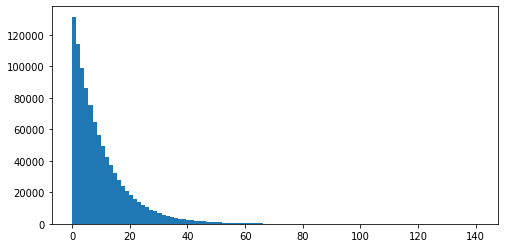

In [ ]:
aleatoria = random.expovariate(1/intervalo)
plt.figure(figsize = (8, 4))
plt.hist([random.expovariate(1/intervalo) for i in range(1000000)], bins = 100)
plt.show()

Además, también se visualiza la aleatorización de random.randint(1,10)

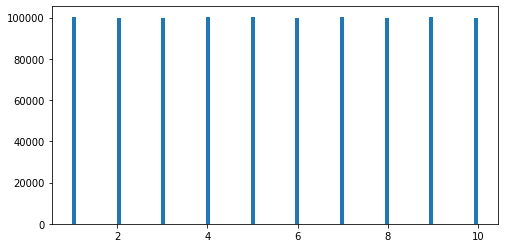

In [ ]:
plt.figure(figsize = (8, 4))
plt.hist([random.randint(1,10) for i in range(1000000)], bins = 100)
plt.show()

#Simulación

In [72]:
tiempos =[]
Semilla = 4
Memoria_RAM_disponible = 100 
aleatorio = [1, 10]  
Velocidad_CPU = 3            
intervalo= 10
lista = []
Procesos =200

for i in range (10000):
  numero = round(random.expovariate(1/intervalo)) 
  lista.append(numero)
  
T_INTER = [min(lista), max(lista)]  


def car(name, env, ram, cpu):
    ram_mem = random.randint(*aleatorio)
    instrucciones   = random.randint(*aleatorio)
    print('%s está esperando por memoria en %.1f' % (name, env.now))
    print('%s se le asignó %.1f MB de RAM y %.1s instrucciones en %.1f' % (name, ram_mem, instrucciones, env.now))
    print('%s está listo para usar el CPU en %.1f' % (name, env.now))
    with ram.request() as req:
        start = env.now
        yield req

        liters_required = ram_mem
        yield cpu.get(liters_required)

        yield env.timeout(instrucciones/ Velocidad_CPU)

        print('%s terminó de usar el CPU en %.1f seconds.' % (name,
                                                          env.now))
        tiempos.append(env.now-start)
        yield cpu.put(liters_required)



def generador_procesos(env, ram, cpu, procesos):
    for i in range(procesos+1):
        yield env.timeout(random.randint(*T_INTER))
        env.process(car('Proceso %d' % i, env, ram, cpu))


print('----------------------Computadora-----------------------')
random.seed(Semilla+25)

env = simpy.Environment()
CPU = simpy.Resource(env, 1)
RAM = simpy.Container(env, Memoria_RAM_disponible, init=Memoria_RAM_disponible)
env.process(generador_procesos(env, CPU, RAM,Procesos))
env.run()


----------------------Computadora-----------------------
Proceso 0 está esperando por memoria en 70.0
Proceso 0 se le asignó 6.0 MB de RAM y 1 instrucciones en 70.0
Proceso 0 está listo para usar el CPU en 70.0
Proceso 0 terminó de usar el CPU en 73.3 seconds.
Proceso 1 está esperando por memoria en 79.0
Proceso 1 se le asignó 5.0 MB de RAM y 2 instrucciones en 79.0
Proceso 1 está listo para usar el CPU en 79.0
Proceso 1 terminó de usar el CPU en 79.7 seconds.
Proceso 2 está esperando por memoria en 156.0
Proceso 2 se le asignó 6.0 MB de RAM y 7 instrucciones en 156.0
Proceso 2 está listo para usar el CPU en 156.0
Proceso 2 terminó de usar el CPU en 158.3 seconds.
Proceso 3 está esperando por memoria en 221.0
Proceso 3 se le asignó 1.0 MB de RAM y 1 instrucciones en 221.0
Proceso 3 está listo para usar el CPU en 221.0
Proceso 3 terminó de usar el CPU en 221.3 seconds.
Proceso 4 está esperando por memoria en 274.0
Proceso 4 se le asignó 8.0 MB de RAM y 4 instrucciones en 274.0
Proceso 4

In [73]:
print(statistics.mean(tiempos))

1.7545605306799217


In [86]:
""" Normales """
##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 10 

datos_10 =[1.8717948717948616,1.6862745098039194,1.676567656765679,1.7152317880794619,1.678275290215572]

##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 5

datos_5 = [1.871794871794877,1.7254901960784326,1.7095709570957087,1.7395143487858744,1.7114427860696544]

##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 1
datos_1 = [1.8717948717948731,1.7124183006535971,1.6930693069306921,1.8208955223880618,1.8208955223880618]


""" Con memoria de 200"""

##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 10 

datos_10_200 =[1.871794871794877,1.7254901960784326,1.7095709570957087,1.7395143487858744,1.7114427860696544]

##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 5

datos_5_200 = [1.8717948717948616,1.6862745098039194,1.676567656765679,1.7152317880794619,1.678275290215572]

##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 1
datos_1_200 = [1.8717948717948731,1.7124183006535971,1.6930693069306921,1.8208955223880618,1.8208955223880618]


""" Procesador más rápido"""
dato_10_rapido =[0.9358974358974461,0.843137254901963, 0.83545121545124,0.93545841245455121,0.87521245451545251]
dato_5_rapido = [0.9752122123623232,0.875121421212121, 0.83485423545452,0.93256523323232323,0.92548887545251]
dato_1_rapido = [0.9358974358974346,0.856209150326795,0.8465346534653474,0.8598233995584982,0.9071310116086213]


""" 2 Procesadores """
##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 10 

datos_10_proc =[1.871794871794877,1.7254901960784326,1.7095709570957087,1.7395143487858744,1.7114427860696544]

##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 5

datos_5_proc = [1.8717948717948616,1.6862745098039194,1.676567656765679,1.7152317880794619,1.678275290215572]

##### Datos promedios obtenidos con los procesos (25,50,100,150,200)con intevalo 1
datos_1_proc = [1.8717948717948731,1.7124183006535971,1.6930693069306921,1.8208955223880618,1.8208955223880618]

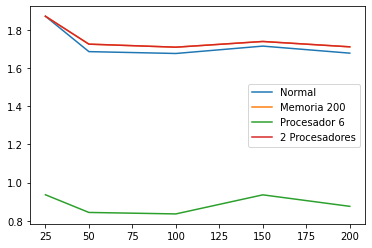

In [94]:
"""intervalo 10"""
x = [25,50,100,150,200]
plt.plot(x,datos_10)
plt.plot(x,datos_10_200)
plt.plot(x,dato_10_rapido)
plt.plot(x,datos_10_proc)
plt.legend(["Normal", "Memoria 200", "Procesador 6","2 Procesadores"])


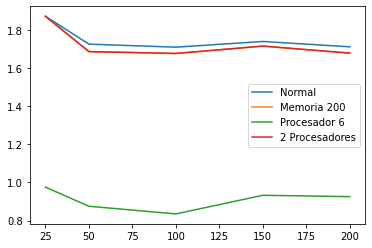

In [95]:
"""intervalo 5"""
x = [25,50,100,150,200]
plt.plot(x,datos_5)
plt.plot(x,datos_5_200)
plt.plot(x,dato_5_rapido)
plt.plot(x,datos_5_proc)
plt.legend(["Normal", "Memoria 200", "Procesador 6","2 Procesadores"])

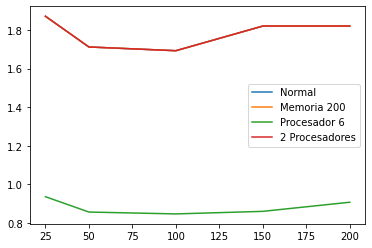

In [96]:
"""intervalo 2"""
x = [25,50,100,150,200]
plt.plot(x,datos_1)
plt.plot(x,datos_1_200)
plt.plot(x,dato_1_rapido)
plt.plot(x,datos_1_proc)
plt.legend(["Normal", "Memoria 200", "Procesador 6","2 Procesadores"])